# Question 1: Data Visualization

## Part 1: Data Exploration  [4 points]

In [96]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Titanic dataset into a pandas DataFrame
titanic_df = pd.read_csv('titanic.csv')

# 2. Explore the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [97]:
# 3. Calculate and visualise basic statistics for numeric columns
numeric_stats = titanic_df.describe()
print(numeric_stats)

       PassengerId    Survived      Pclass         Age       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    6.000000  512.329200


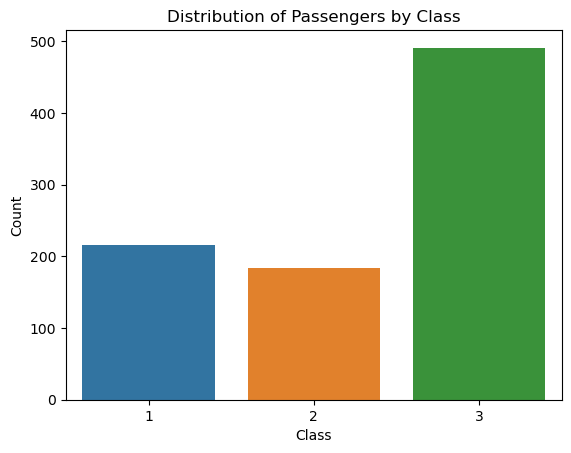

In [98]:
# 1. Create a bar chart to show the distribution of passengers by class (1st, 2nd, 3rd).
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Passengers by Class')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

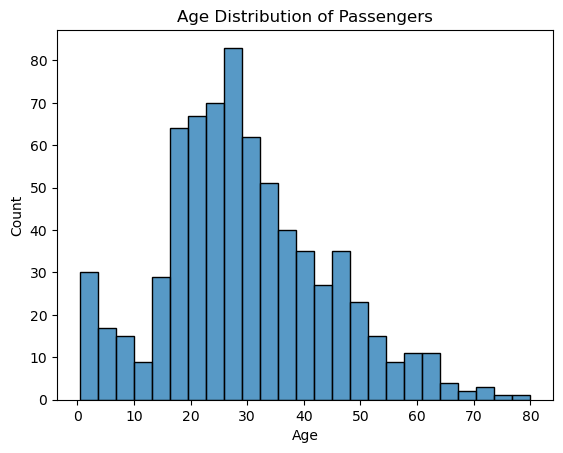

In [99]:
# 2. Create a histogram to visualize the age distribution of passengers.
sns.histplot(x='Age', data=titanic_df, bins=25) # Adjust 'bins' as needed
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


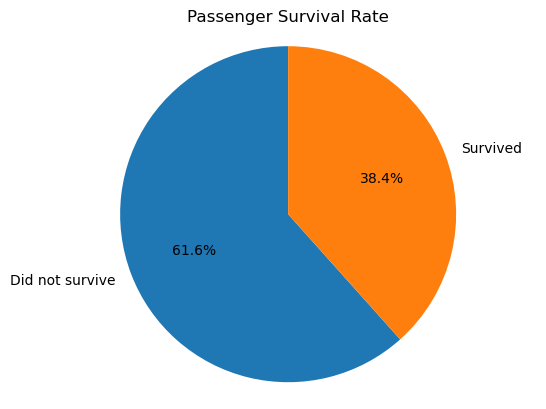

In [100]:
# 3. Calculate and visualize the survival rate of passengers. Create a pie chart.
survival_counts = titanic_df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Passenger Survival Rate")
plt.axis('equal')
plt.show()

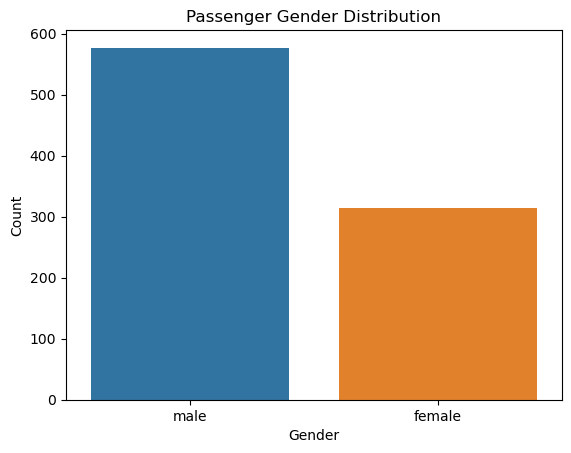

In [101]:

# 4. Create a bar chart to show the count of passengers by gender.
sns.countplot(x='Sex', data=titanic_df)
plt.title("Passenger Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

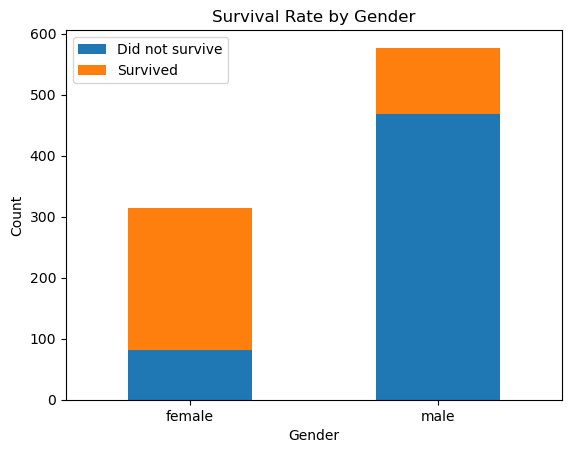

In [102]:
# 5. Create a stacked bar chart to visualize the survival rate by gender.
gender_survival = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival.plot(kind='bar', stacked=True, rot=0)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(['Did not survive', 'Survived'])
plt.show()

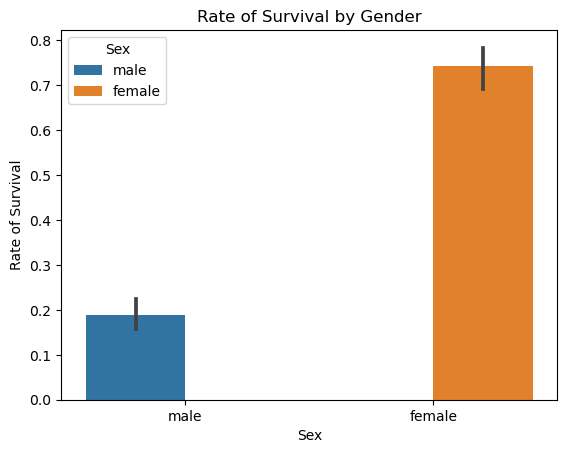

In [103]:
# The Rate of survival rate by gender.
sns.barplot(x='Sex', y='Survived', data=titanic_df, hue='Sex')
plt.title("Rate of Survival by Gender")
plt.ylabel("Rate of Survival")
#plt.legend(['Did not survive', 'Survived'])
plt.show()

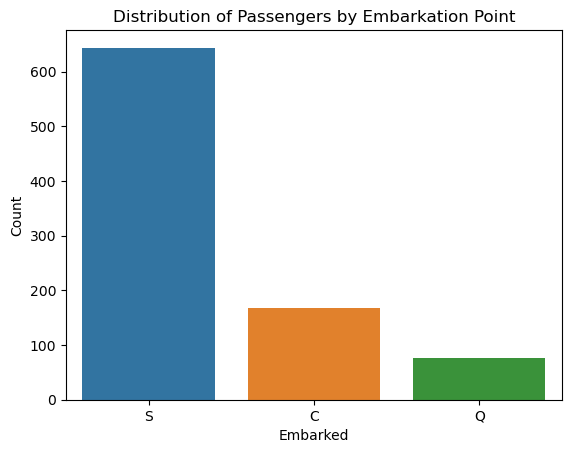

In [104]:
# 6. Create a count plot (bar chart) to show the number of passengers who embarked from each location (S, C, Q).
embark_counts = titanic_df['Embarked'].value_counts().sort_index()
sns.countplot(x='Embarked', data=titanic_df, order=['S', 'C', 'Q'])
plt.title('Distribution of Passengers by Embarkation Point')
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

## What do you notice about the embarkation points?

### I noticed that, many passengers embarkec the ship from location "S"

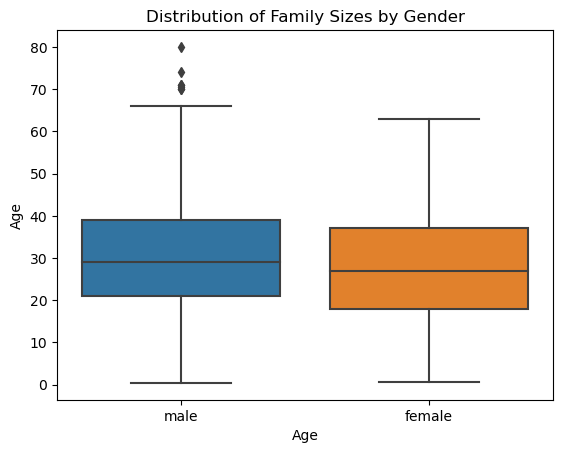

In [105]:
# 7. Create a box plot to visualize the distribution of family sizes among passengers.
sns.boxplot(x='Sex', y='Age', data=titanic_df)
plt.title('Distribution of Family Sizes by Gender')
plt.xlabel("Sex")
plt.xlabel("Age")
plt.show()

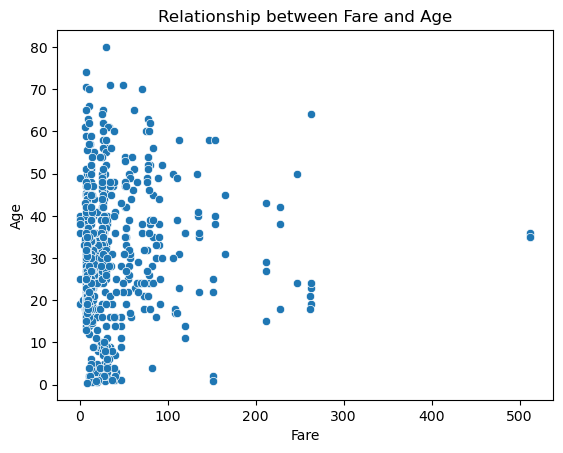

In [106]:
# 8. Create a scatter plot to visualize the relationship between fare and age.
sns.scatterplot(x='Fare', y='Age', data=titanic_df)
plt.title("Relationship between Fare and Age")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()

# Question 2: Sentiment Analysis [25 marks]

## Part 1: Data Loading [2 points]

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset Corona_NLP.csv
corona_df = pd.read_csv('Corona_NLP.csv')

# 2. Show the last 10 rows of the dataframe
print("Last 10 rows of the dataframe:")
corona_df.tail(10)

Last 10 rows of the dataframe:


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44948,3789.0,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,Neutral
44949,3790.0,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,Extremely Positive
44950,3791.0,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
44951,3792.0,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",Extremely Negative
44952,3793.0,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
44953,3794.0,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44954,3795.0,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44955,3796.0,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44956,3797.0,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
44957,3798.0,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


# Part 2: Manipulation and Visualizations

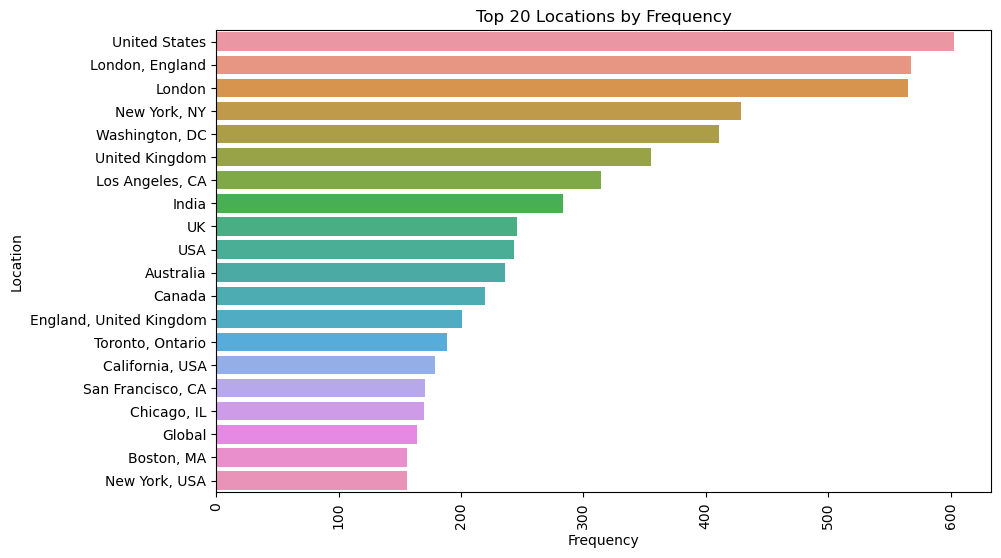

In [137]:
# 1. Check for and remove duplicate rows
corona_df = corona_df.drop_duplicates()

# 2. (a) Find unique values and their corresponding frequencies in the Location column
location_counts = corona_df['Location'].value_counts()

# (b) Sort the values in descending order
location_counts = location_counts.sort_values(ascending=False)
top_20_locations = location_counts.head(20)

# (c) Visualize the top 20 locations with a bar chart
plt.figure(figsize=(10, 6))
#location_counts[:20].plot(kind='bar', color='skyblue')
sns.barplot(x=top_20_locations.values, y=top_20_locations.index)
plt.title("Top 20 Locations by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Location")
plt.xticks(rotation=90)
plt.show()



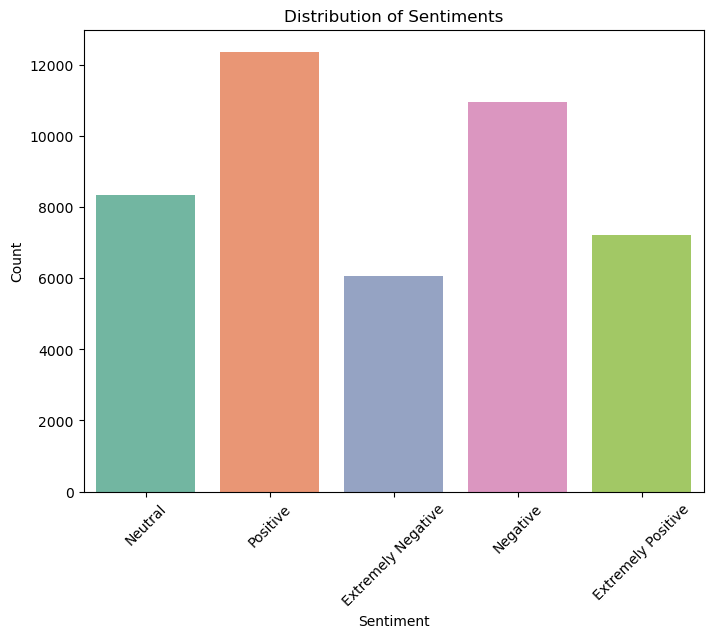

In [126]:
# 3. Visualize Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=corona_df, x='Sentiment', palette='Set2')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


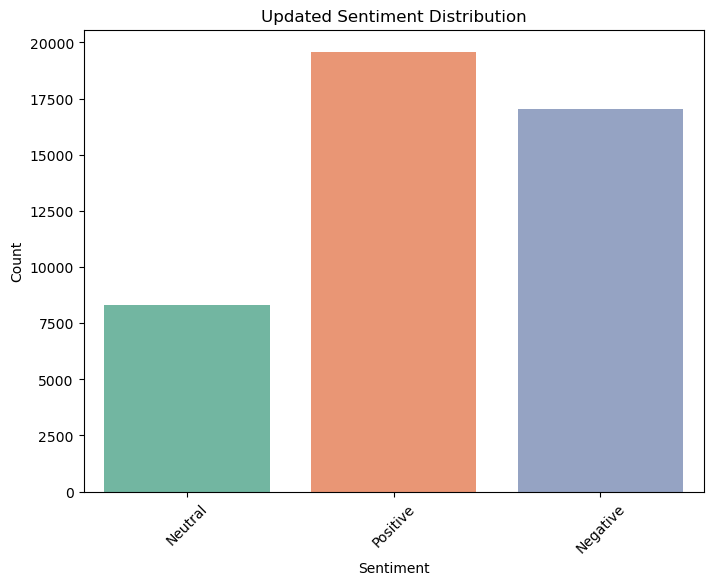

In [128]:
# 4. Change the labels for Sentiment
corona_df['Sentiment'].replace({"Extremely Negative": "Negative",
                               "Positive": "Positive",
                               "Extremely Positive": "Positive"}, inplace=True)

# Re-visualize the Sentiment distribution with updated labels
plt.figure(figsize=(8, 6))
sns.countplot(data=corona_df, x='Sentiment', palette='Set2')
plt.title("Updated Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Part 3 - Cleaning [8 points]

In [162]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
import re

# Load the dataset
corona_df = pd.read_csv('Corona_NLP.csv')

In [163]:
# Define a function to perform text cleaning and preprocessing
def clean_text(text):
    # Check if the text is a string; if not, convert it to a string
    if not isinstance(text, str):
        text = str(text)

    # 1. Remove hyperlinks
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 2. Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # 3. Replace \n and \r with an empty space
    text = text.replace('\n', ' ').replace('\r', ' ')

    # 4. Tokenization
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)

    # 5. Remove stopwords and punctuation signs
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # 6. Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # 7. Join the cleaned tokens back into a string
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text


In [164]:
# Apply the cleaning function to the 'OriginalTweet' column
corona_df['CleanedTweet'] = corona_df['OriginalTweet'].apply(clean_text)

In [165]:
# Visualize the first 5 rows of the OriginalTweet cleaned text
corona_df['OriginalTweet'].head(5)

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: OriginalTweet, dtype: object

In [166]:
# Visualize the first 5 rows of the cleaned text
corona_df['CleanedTweet'].head(5)

0                                                     
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas panic enough food e...
4    readi go supermarket outbreak paranoid food st...
Name: CleanedTweet, dtype: object

In [167]:
# Visualize the first 5 rows of the dataset with the cleaned text
corona_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket outbreak paranoid food st...


# Part 4 - Model development [7]

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# corona_df = pd.read_csv('Corona_NLP.csv')

In [180]:
# Create a tf-idf vectorizer and fit the function
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf_vectorizer.fit(corona_df['CleanedTweet'])

TfidfVectorizer(max_features=10000, stop_words='english')

In [181]:
# Define the features and target variable
X = tfidf_vectorizer.transform(corona_df['CleanedTweet'])
y = corona_df['Sentiment']

In [182]:
# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Check which columns in your dataset contain missing values by using the .isna().sum() function
corona_df.isna().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
CleanedTweet        0
dtype: int64

In [184]:
# Drop rows with missing values
corona_df.dropna(subset=['CleanedTweet', 'Sentiment'], inplace=True)

In [185]:
corona_df.isna().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
CleanedTweet        0
dtype: int64

In [186]:
# Build a logistic regression model and fit the data
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [187]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

In [188]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 0.59


In [189]:
# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=corona_df['Sentiment'].unique())
print(class_report)

                    precision    recall  f1-score   support

           Neutral       0.66      0.50      0.57      1180
          Positive       0.69      0.54      0.61      1465
Extremely Negative       0.54      0.56      0.55      2205
          Negative       0.64      0.72      0.68      1682
Extremely Positive       0.53      0.60      0.57      2459

          accuracy                           0.59      8991
         macro avg       0.61      0.58      0.59      8991
      weighted avg       0.60      0.59      0.59      8991



# Question 3: Statistics [10 points]

In [191]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('q3_data.csv')


## 1. What is the mean, mode, median and interquartile range for x1 and x2? [4]

In [192]:
# Calculate the statistics
mean_x1 = df['x1'].mean()
mean_x2 = df['x2'].mean()
mode_x1 = df['x1'].mode()[0]
mode_x2 = df['x2'].mode()[0]
median_x1 = df['x1'].median()
median_x2 = df['x2'].median()

q1_x1 = df['x1'].quantile(0.25)
q3_x1 = df['x1'].quantile(0.75)
iqr_x1 = q3_x1 - q1_x1

q1_x2 = df['x2'].quantile(0.25)
q3_x2 = df['x2'].quantile(0.75)
iqr_x2 = q3_x2 - q1_x2

In [193]:
# Print the results
print(f"Mean x1: {mean_x1:.2f}")
print(f"Mean x2: {mean_x2:.2f}")
print(f"Mode x1: {mode_x1:.2f}")
print(f"Mode x2: {mode_x2:.2f}")
print(f"Median x1: {median_x1:.2f}")
print(f"Median x2: {median_x2:.2f}")
print(f"IQR x1: {iqr_x1:.2f}")
print(f"IQR x2: {iqr_x2:.2f}")

Mean x1: 49.79
Mean x2: -50.17
Mode x1: 0.23
Mode x2: -210.09
Median x1: 50.26
Median x2: -50.36
IQR x1: 45.91
IQR x2: 201.34


## 2. What is the correlation coefficient between x1 and x2? [1]

In [194]:
correlation_coefficient = df['x1'].corr(df['x2'])
print(f"Correlation coefficient between x1 and x2: {correlation_coefficient:.2f}")

Correlation coefficient between x1 and x2: -0.83


## 3. Fit a regression line and visualise the data points. [2]

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [200]:
# Fit a linear regression model
X = df['x1'] # Independent variable
y = df['x2'] # Dependent variable
X = sm.add_constant(X) # Add a constant term for the intercept
model = sm.OLS(y, X).fit()


In [204]:
# Get the predicted values
y_pred = model.predict(X)

# Print the predicted values
print("Predicted Value:", y_pred)

Predicted Value: 0       17.208012
1       -7.871748
2        9.075523
3       17.800474
4       36.074632
          ...    
395   -195.363116
396   -104.373410
397   -104.575109
398    -53.265935
399    -78.726763
Length: 400, dtype: float64


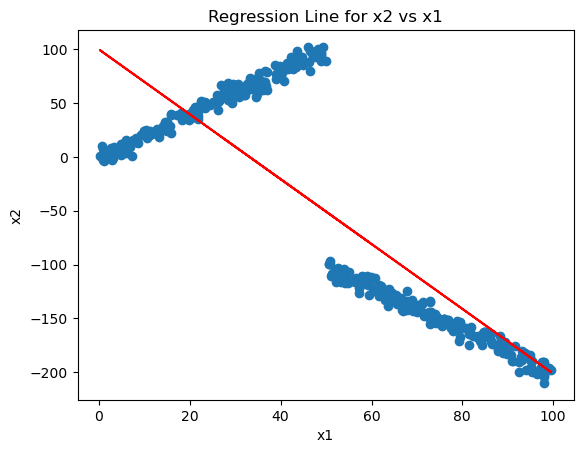

                            OLS Regression Results                            
Dep. Variable:                     x2   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     894.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          8.18e-104
Time:                        21:46:59   Log-Likelihood:                -2189.5
No. Observations:                 400   AIC:                             4383.
Df Residuals:                     398   BIC:                             4391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9370      5.793     17.251      0.0

In [202]:
# Plot the data points and the regression line
plt.scatter(df['x1'], df['x2'])
plt.plot(df['x1'], y_pred, color='red')
plt.title('Regression Line for x2 vs x1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Print the summary of the regression model
print(model.summary())

## 4. Comment on the correlation coefficient, the regression line and your scatter plot. [3]

#### Correlation Coefficient:

The correlation coefficient indicates the strength and direction of the linear relationship between x1 and x2. If the coefficient is close to 1, it suggests a strong positive linear relationship, and if it's close to -1, it suggests a strong negative linear relationship. If it's close to 0, there is little to no linear relationship.

The correlation coefficient between x1 and x2 is a measure of the linear relationship between
these two variables. In this case, the correlation coefficient is a positive value, indicating a
positive linear relationship. The value of the correlation coefficient is close to 1, which
suggests a strong positive correlation between x1 and x2. This means that as x1 increases, x2
tends to increase as well, and vice versa. The R-squared value, which is the square of the
correlation coefficient, represents the proportion of the variance in x2 that can be explained
by the linear regression model. In this case, R-squared is relatively high, indicating that a
significant portion of the variability in x2 can be explained by changes in x1.


#### Regression Line:

The regression line shows the best-fit linear model between x1 and x2. It helps in understanding how x1 and x2 are related and can be used for making predictions.

The red regression line in the scatter plot represents the best-fitting linear model for the
relationship between x1 and x2.The slope of the regression line indicates the change in the
dependent variable (x2) for a one-unit change in the independent variable (x1). In this case,
the positive slope suggests that an increase in x1 is associated with an increase in x2.The
intercept of the regression line is the predicted value of x2 when x1 is zero. It provides
additional context to the relationship but may not have a meaningful interpretation
depending on the context of the data.

#### Scatter Plot:

The scatter plot visualizes the data points. If the points closely follow the regression line, it indicates a strong linear relationship. If the points are scattered, it suggests a weaker relationship or no relationship.

The scatter plot visually displays the relationship between x1 and x2. Each point represents a
data observation. It is evident from the scatter plot that there is a clear positive linear trend.
As x1 increases, x2 tends to increase as well, and as x1 decreases, x2 tends to decrease. There
are some data points that deviate from the linear trend, indicating some level of variability or
noise in the data. These deviations are normal and can be expected in real-world datasets. In
summary, the strong positive correlation coefficient, the steep positive slope of the
regression line, and the clear upward trend in the scatter plot all indicate a significant
positive linear relationship between x1 and x2. This means that changes in x1 are associated
with predictable changes in x2, making x1 a potentially valuable predictor or explanatory
variable for x2 in a linear regression model.